In [1]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..'))

In [2]:
import torch
import seaborn as sns
import scipy.sparse as ssp
import scipy.sparse.csgraph as csg
import numpy as np
import matplotlib.pyplot as plt

from torch_geometric.datasets import CitationFull
from gnn import  DATA_PATH

In [3]:
ds = CitationFull(DATA_PATH, name='citeseer')
data = ds.data

In [4]:
data

Data(x=[4230, 602], edge_index=[2, 10674], y=[4230])

In [5]:
nodes = len(data.x)
print(f"#nodes: {len(data.x)}\n#edges: {data.edge_index.shape[-1]}")

#nodes: 4230
#edges: 10674


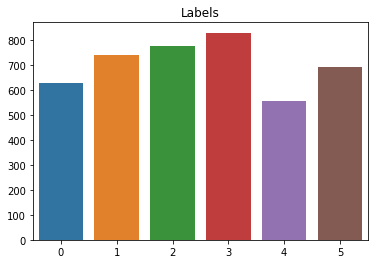

In [6]:
label_count = torch.bincount(data.y).numpy()
ax = sns.barplot(x=list(range(len(label_count))), y=label_count, ci=None)
ax.set_title("Labels")
plt.show()

# Spectrum

In [7]:
row = data.edge_index[0].numpy()
col = data.edge_index[1].numpy()
entries = np.ones(data.edge_index.shape[-1])

adj = ssp.csr_matrix((entries, (row, col)), shape=(nodes, nodes))

print(f"Is symmetric: {bool(~(adj.transpose() != adj).sum())}")

adj.shape

Is symmetric: True


(4230, 4230)

In [8]:
# scipy performs efficient computation of Laplacian, operating on values only
laplacian = csg.laplacian(adj, normed=True)

In [9]:
k_eig = 10
eig_values, eig_vectors = ssp.linalg.eigsh(laplacian, k=k_eig)

Text(0.5, 1.0, 'Eigenvalues of normalized graph Laplacian')

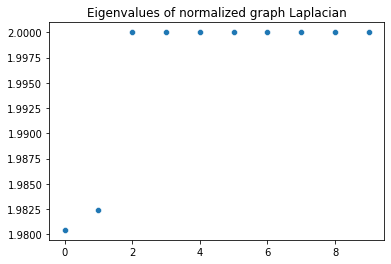

In [10]:
_, ax = plt.subplots(1,1)
ax = sns.scatterplot(x=np.arange(k_eig), y=eig_values, ax=ax)
ax.set_title("Eigenvalues of normalized graph Laplacian")

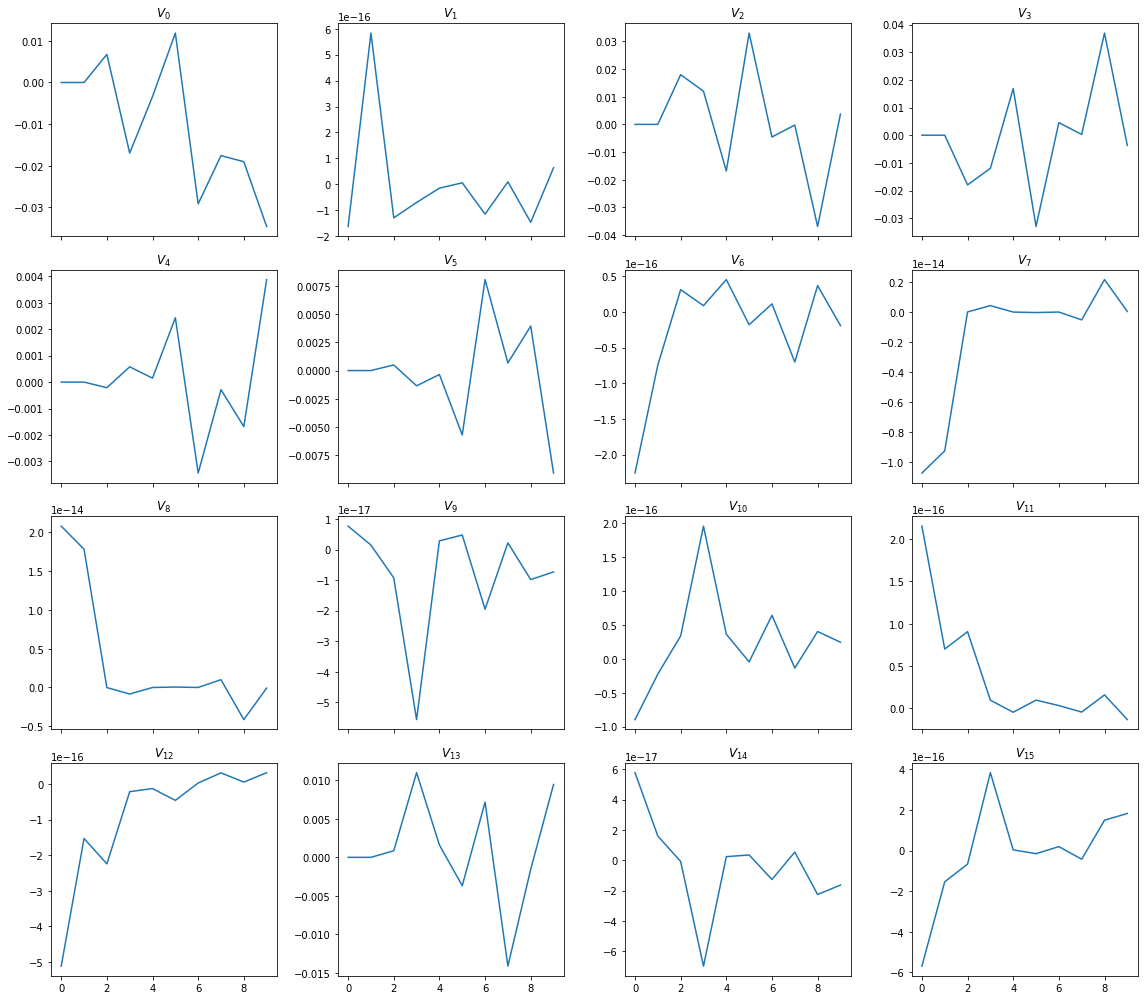

In [11]:
# plot examples row from matrix of eigenvectors
rows, cols =4, 4
fig, axes = plt.subplots(rows, cols, figsize=(16, rows*3.5), sharex=True)
for i, (vec, ax) in enumerate(zip(eig_vectors, axes.flatten())):
    ax.plot(vec)
    ax.set_title(f"$V_{{{i}}}$")

fig.tight_layout()
plt.show()